In [1]:
import sys; sys.path.append("../") # For relative imports

from utils.experiment_utils import *

%load_ext autoreload
%autoreload 2

In [2]:
method_to_name = {'standard': 'Standard', 
                  'classwise': 'Classwise',
                  'cluster_random': 'Clustered',
                  'exact_coverage_standard': 'Randomized Standard',
                  'exact_coverage_classwise': 'Randomized Classwise',
                  'exact_coverage_cluster': 'Randomized Clustered'}

metric_to_name = {'class_cov_gap': 'CovGap', 'avg_set_size': 'AvgSize', 'very_undercovered': 'FracUnderCov',
                 'undercov_gap': 'UnderCovGap', 'overcov_gap': 'OverCovGap'}     

dataset_to_name = {'imagenet': 'ImageNet', 'cifar-100': 'CIFAR-100', 
                       'places365': 'Places365', 'inaturalist': 'iNaturalist'}

In [3]:
def make_line_plot(aggregated_results, ax, 
                        n_list = [10, 20, 30, 40, 50, 75, 100, 150],
                        metric_to_name = {'class_cov_gap': 'CovGap', 'avg_set_size': 'AvgSize', 
                                          'very_undercovered': 'FracUnderCov'},
                        method_list = ['standard', 'classwise', 'cluster_random'],
                        method_to_name = {'standard': 'Standard', 
                                          'classwise': 'Classwise',
                                          'cluster_random': 'Clustered',
                                          'exact_coverage_standard': 'Randomized Standard',
                                          'exact_coverage_classwise': 'Randomized Classwise',
                                          'exact_coverage_cluster': 'Randomized Clustered'},
                        dataset_to_name = {'imagenet': 'ImageNet', 'cifar-100': 'CIFAR-100', 
                       'places365': 'Places365', 'inaturalist': 'iNaturalist'},
                        specify_color={}):

    print(f'{dataset_to_name[dataset]}, {score_function} ({cal_sampling} calibration set)')

    for method in method_list:
        x = n_list
        y = np.array(aggregated_results[f'{metric}_mean'][method])
        se = np.array(aggregated_results[f'{metric}_se'][method])
        if method in specify_color:
            color = specify_color[method]
            ax.plot(x, y, '-o', label=method_to_name[method], alpha=1, color=color)         
            ax.fill_between(x, y-1.96*se, y+1.96*se, alpha=0.4, color=color) # Add 95% error bars
        else:
            ax.plot(x, y, '-o', label=method_to_name[method], alpha=1)
            ax.fill_between(x, y-1.96*se, y+1.96*se, alpha=0.4) # Add 95% error bars

        ax.set_xlabel('$n_{avg}$', fontsize=FONT_SIZE)


    ax.set_xscale('squareroot')
    ax.set_xlim(left=8)
    
    if metric == 'class_cov_gap':
        ax.set_ylim(1,9)
#     if metric == 'avg_set_size':
#         ax.set_ylim(0,40)

    ax.set_xticks(n_list)
    ax.tick_params(labelsize=FONT_SIZE-2) # Adjust tick label font size



ImageNet, softmax (random calibration set)
ImageNet, softmax (random calibration set)
ImageNet, softmax (random calibration set)
CIFAR-100, softmax (random calibration set)
CIFAR-100, softmax (random calibration set)
CIFAR-100, softmax (random calibration set)
Places365, softmax (random calibration set)
Places365, softmax (random calibration set)
Places365, softmax (random calibration set)
iNaturalist, softmax (random calibration set)
iNaturalist, softmax (random calibration set)
iNaturalist, softmax (random calibration set)


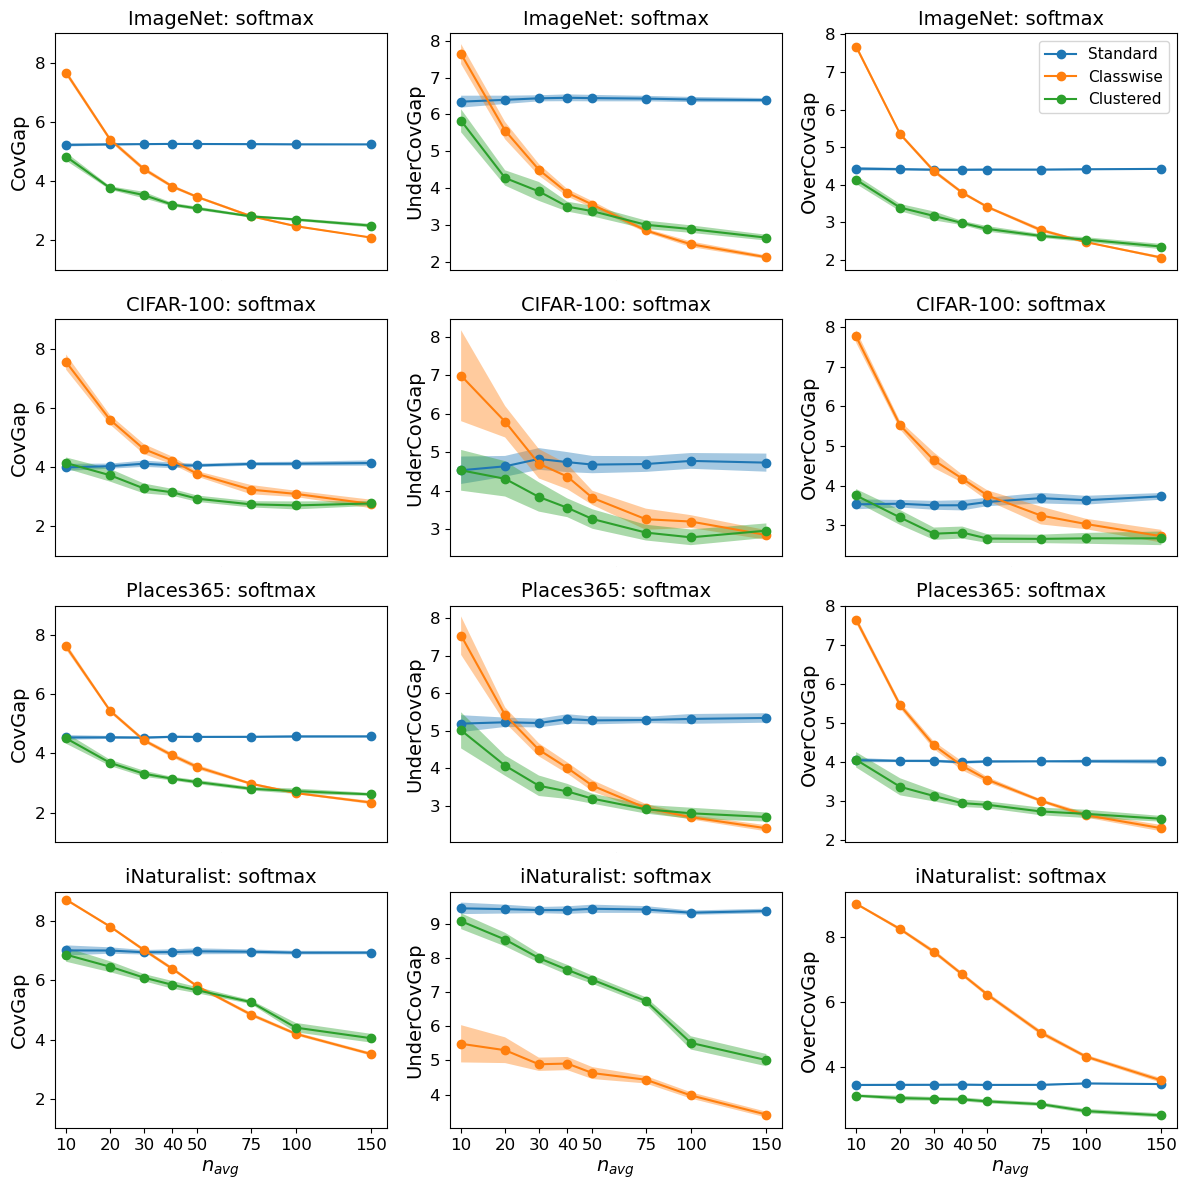

ImageNet, APS (random calibration set)
ImageNet, APS (random calibration set)
ImageNet, APS (random calibration set)
CIFAR-100, APS (random calibration set)
CIFAR-100, APS (random calibration set)
CIFAR-100, APS (random calibration set)
Places365, APS (random calibration set)
Places365, APS (random calibration set)
Places365, APS (random calibration set)
iNaturalist, APS (random calibration set)
iNaturalist, APS (random calibration set)
iNaturalist, APS (random calibration set)


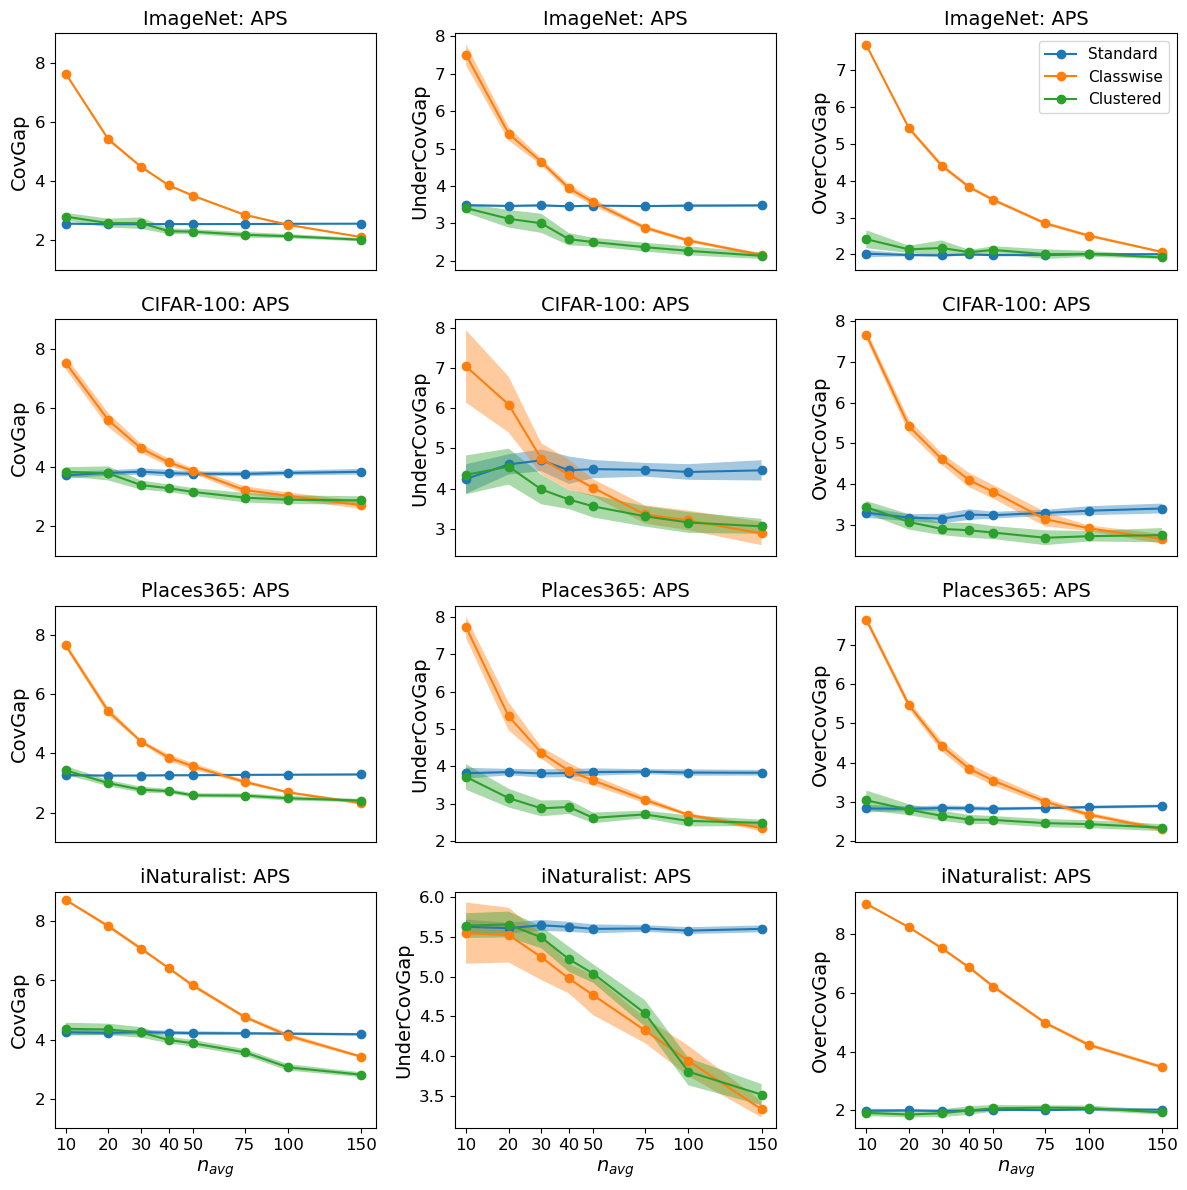

ImageNet, RAPS (random calibration set)
ImageNet, RAPS (random calibration set)
ImageNet, RAPS (random calibration set)
CIFAR-100, RAPS (random calibration set)
CIFAR-100, RAPS (random calibration set)
CIFAR-100, RAPS (random calibration set)
Places365, RAPS (random calibration set)
Places365, RAPS (random calibration set)
Places365, RAPS (random calibration set)
iNaturalist, RAPS (random calibration set)
iNaturalist, RAPS (random calibration set)
iNaturalist, RAPS (random calibration set)


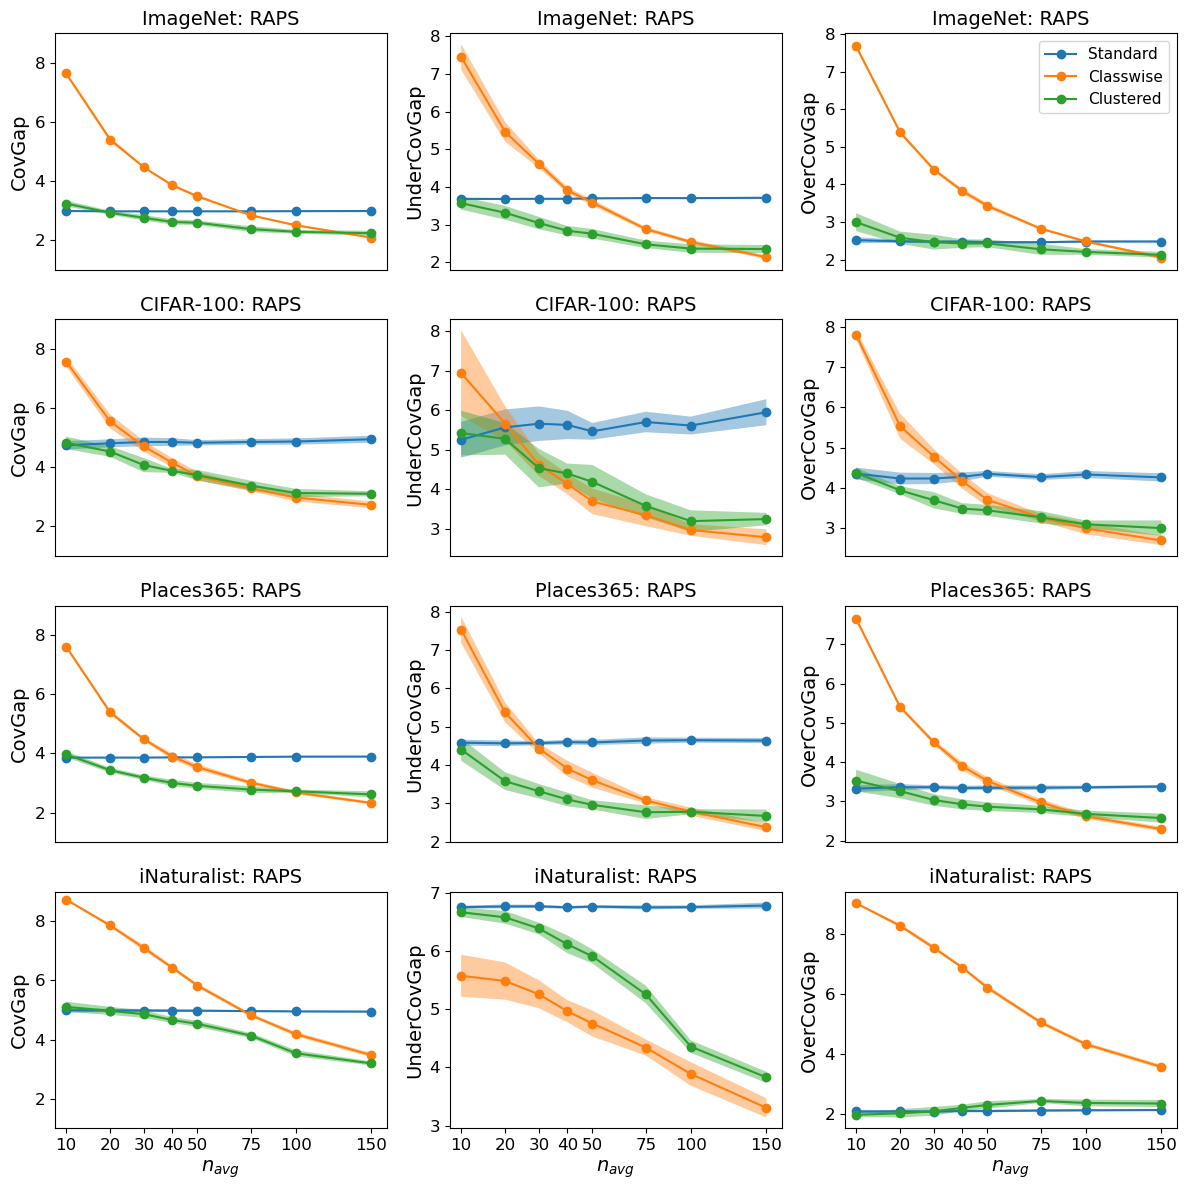

In [4]:
FONT_SIZE = 14
fig_height = 12

# metric_list = ['avg_set_size', 'very_undercovered']
metric_list = ['class_cov_gap', 'undercov_gap', 'overcov_gap']
fig_folder = '/home/tding/code/class-conditional-conformal/rebuttal' # UPDATE

cal_sampling = 'random'
dataset_list = ['imagenet', 'cifar-100', 'places365', 'inaturalist']
score_function_list = ['softmax','APS', 'RAPS']
method_list = ['standard', 'classwise', 'cluster_random']

nrows = len(dataset_list)
ncols = len(score_function_list)



for score_function in score_function_list:
    
    fig, axs = plt.subplots(nrows,ncols, 
#                 gridspec_kw={'wspace':0.04, # Horizontal space between subplots
#                              'hspace': 0.18}, # Vertical space between subplots
                figsize=(12, fig_height)) # Prev: (12,9)

    for i, dataset in enumerate(dataset_list):    

        for j, metric in enumerate(metric_list):

            ax = axs[i][j]

            aggregated_results = get_metric_df(dataset, cal_sampling, metric, score_function, 
                                               method_list=method_list, print_folder=False)

            # Plot
            make_line_plot(aggregated_results, ax, method_list=method_list)
            ax.set_title(f'{dataset_to_name[dataset]}: {score_function}', 
                         fontsize=FONT_SIZE)
#                          pad=-3) # Shift plot title down


            # Remove x-ticks except for bottom plots
            if i < nrows - 1:
                ax.set_xticks([])
                ax.set_xlabel('.', fontsize=1) # hacky fix

#             # Remove y-ticks and label except for left-most plots
#             if j > 0:
#                 ax.set_yticks([])


            # Set y-label
            if j == 0:
                ax.set_ylabel(metric_to_name[metric], fontsize=FONT_SIZE)
                
            # Apply row-by-row adjustments
            if metric == 'avg_set_size':
                ax.set_ylim(0,40)
            elif metric == 'very_undercovered':
                if dataset == 'imagenet' or dataset == 'places365':
                    ax.set_ylim(0,.09)
                if dataset == 'cifar-100':
                    ax.set_ylim(0,.10)
                if dataset == 'inaturalist':
                    ax.set_ylim(0,.22)
                    
            # For AvgSize
#             if metric == 'avg_set_size':
#                 ax.set_yscale('squareroot') # Use square-root y-axis


            axs[i, j].set_ylabel(metric_to_name[metric], fontsize=FONT_SIZE)
    axs[0, ncols-1].legend(fontsize=FONT_SIZE-3) # Only show legend on right-most plot

    plt.tight_layout()
#     save_to = os.path.join(fig_folder, f'alldatasets_{cal_sampling}calset_{metric}_height{fig_height}.pdf')
#     plt.savefig(save_to, bbox_inches='tight')
#     print(f'Saved figure to {save_to}')

    plt.show()